**Author**: Naomi Baes and Chat GPT

**Purpose**: Process context (lines) files for specified terms and corpora, extract counts of occurrences of relevant years, aggregate these counts based on year, term, and corpus, and then write the aggregated data to a CSV for further analysis or reporting; plot to determine how large the intervals can be.

**Aim**: Get year_counts_lines for all corpora and target_terms

# Setup

Filter lines by term and corpus to create the year_counts_lines.csv file (no saving the intermediate file with lines for each term and corpus)

In [1]:
import os
import pandas as pd

# List of input files for different datasets
input_files = {
    'cohacoca': "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/COHACOCA/coha.coca.cleaned2.lc.no-numb.noacad.mental",
    'psych': "C:/Users/naomi/OneDrive/COMP80004_PhDResearch/RESEARCH/DATA/CORPORA/Psychology/abstract_year_journal.csv.mental"
}

# Output directory to store the final CSV file
output_directory = "output"
output_file = "year_counts_lines.csv"

# Terms to filter
targets = ['mental_health', 'mental_illness', 'perception']

# Function to extract counts from lines
def extract_counts(lines, target):
    counts_dict = {}
    for line in lines:
        parts = line.split('|||||')
        if len(parts) >= 1:
            first_column = parts[0].strip()
            if target in first_column:
                year = parts[1].strip()
                if year.isdigit() and 1970 <= int(year) <= 2019:
                    counts_dict[year] = counts_dict.get(year, 0) + 1
    return counts_dict

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List to hold dataframes for each term and corpus
dfs = []

# Process each term and corpus
for corpus, file_path in input_files.items():
    with open(file_path, "r", encoding="utf-8") as infile:
        lines = infile.readlines()
        for target in targets:
            filtered_lines = [line for line in lines if target in line.split('|||||')[0].strip()]
            counts = extract_counts(filtered_lines, target)
            total_lines = len(filtered_lines)
            print(f"Total lines for target '{target}' in corpus '{corpus}': {total_lines}")
            if counts:
                df = pd.DataFrame({'target': target, 'corpus': corpus, 'year': list(counts.keys()), 'count': list(counts.values())})
                dfs.append(df)

# Concatenate all dataframes into a single dataframe
if dfs:
    aggregated_df = pd.concat(dfs, ignore_index=True)

    # Write the aggregated dataframe to a CSV file
    output_path = os.path.join(output_directory, output_file)
    aggregated_df.to_csv(output_path, index=False)

    print(f"Data written to {output_path}")
else:
    print("No data found for the specified target and corpora.")


Total lines for target 'mental_health' in corpus 'cohacoca': 3233
Total lines for target 'mental_illness' in corpus 'cohacoca': 1559
Total lines for target 'perception' in corpus 'cohacoca': 9440
Total lines for target 'mental_health' in corpus 'psych': 26482
Total lines for target 'mental_illness' in corpus 'psych': 4219
Total lines for target 'perception' in corpus 'psych': 54694
Data written to output\year_counts_lines.csv


# Plot the year_counts_lines.csv trends to determine BERT intervals

In [2]:
# Setup dependencies
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the path to the CSV file
csv_file = "output/year_counts_lines.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

##  1-year intervals

C:\Users\naomi\AppData\Local\Temp\ipykernel_10236\3014749072.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pd.to_numeric(filtered_df['year'])


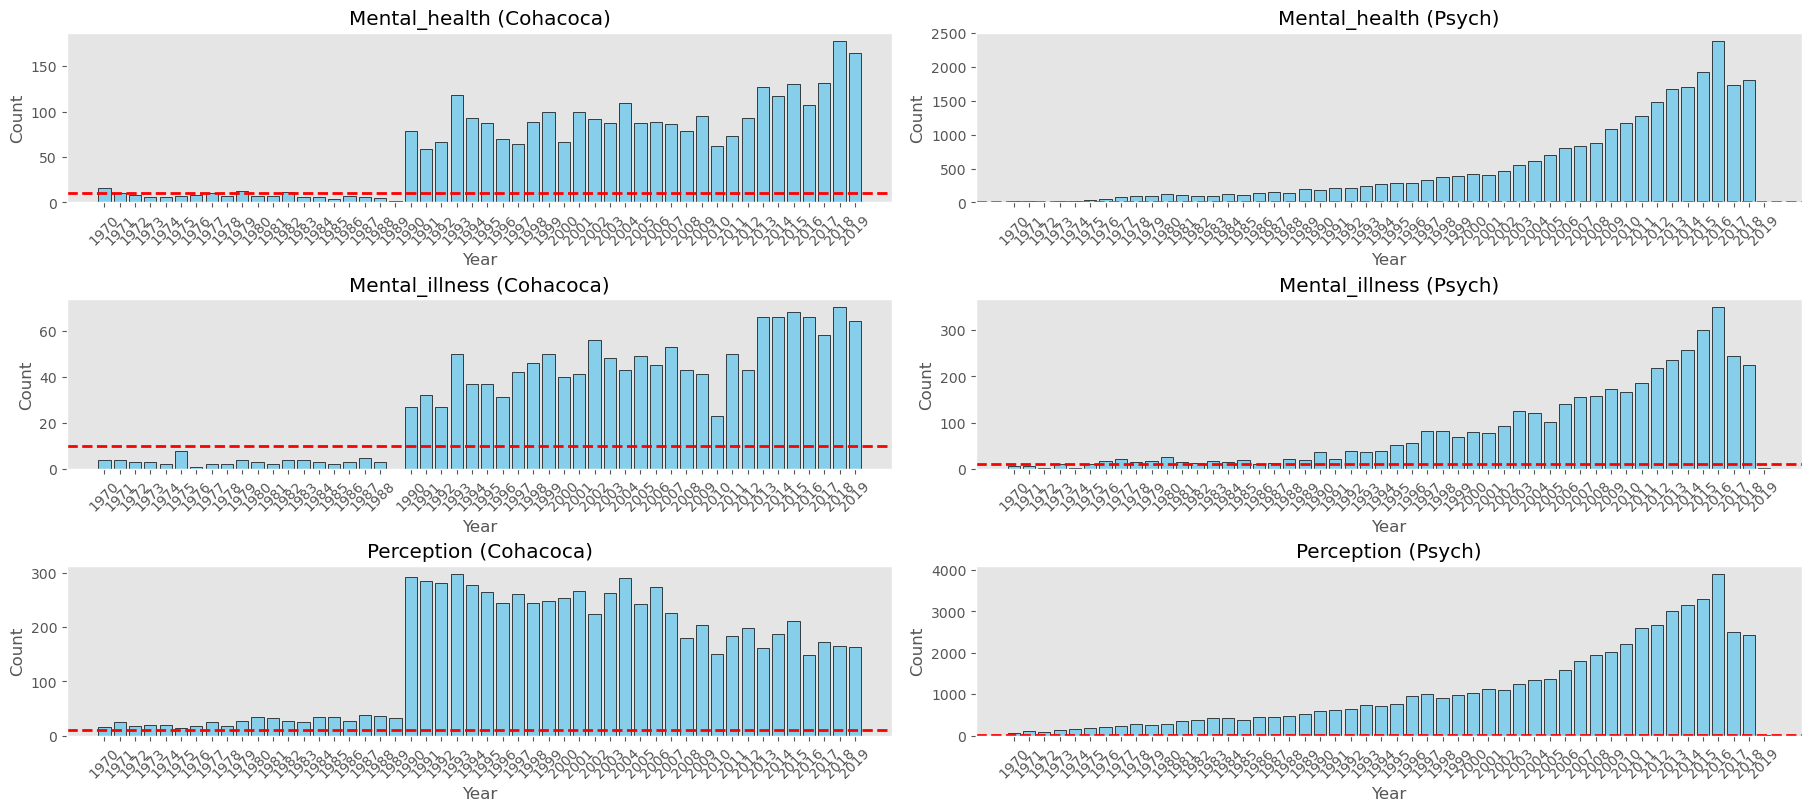

In [3]:
# Set the style to mimic ggplot2 classic
plt.style.use('ggplot')

# Get unique terms and corpora from the DataFrame
targets = df['target'].unique()
corpora = df['corpus'].unique()

# Define the year range and padding
start_year = 1970
end_year = 2019
padding = 0.05  # Adjust this value for the desired amount of padding

# Calculate the adjusted x-axis limits with padding
x_min = start_year - (end_year - start_year) * padding
x_max = end_year + (end_year - start_year) * padding

# Plotting bar plots of count distribution for each term and corpus
fig, axs = plt.subplots(len(targets), len(corpora), figsize=(18, 8), constrained_layout=True)

for i, target in enumerate(targets):
    for j, corpus in enumerate(corpora):
        ax = axs[i, j]
        filtered_df = df[(df['target'] == target) & (df['corpus'] == corpus)]
        
        if not filtered_df.empty:  # Check if filtered dataframe is not empty
            # Convert 'year' column to numeric
            filtered_df['year'] = pd.to_numeric(filtered_df['year'])
            
            # Plot bar plot of count distribution
            ax.bar(filtered_df['year'], filtered_df['count'], color='skyblue', edgecolor='black')  # Use 'year' for x-axis and 'count' for y-axis
            ax.set_title(f"{target.capitalize()} ({corpus.capitalize()})")
            ax.set_xlabel('Year')
            ax.set_ylabel('Count')
            ax.grid(False)  # Turn off grid
            
            # Set x-axis ticks and labels explicitly for better control
            years = filtered_df['year'].unique()
            ax.set_xticks(years)
            ax.set_xticklabels(years, rotation=45)  # Rotate x-axis labels for better readability
            
            # Add horizontal line at count = 10
            ax.axhline(y=10, color='red', linestyle='--', linewidth=2)  # Customize the horizontal line
            
            # Set adjusted x-axis limits with padding
            ax.set_xlim(x_min, x_max)  # Set x-axis limits with padding
            
        else:
            # If no data matches the filtering criteria, show a message
            ax.text(0.5, 0.5, "No Data", ha='center', va='center', transform=ax.transAxes)

plt.show()


## 5-year intervals

C:\Users\naomi\AppData\Local\Temp\ipykernel_10236\871531214.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pd.to_numeric(filtered_df['year'])
C:\Users\naomi\AppData\Local\Temp\ipykernel_10236\871531214.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year_interval'] = (filtered_df['year'] // interval) * interval
C:\Users\naomi\AppData\Local\Temp\ipykernel_10236\871531214.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

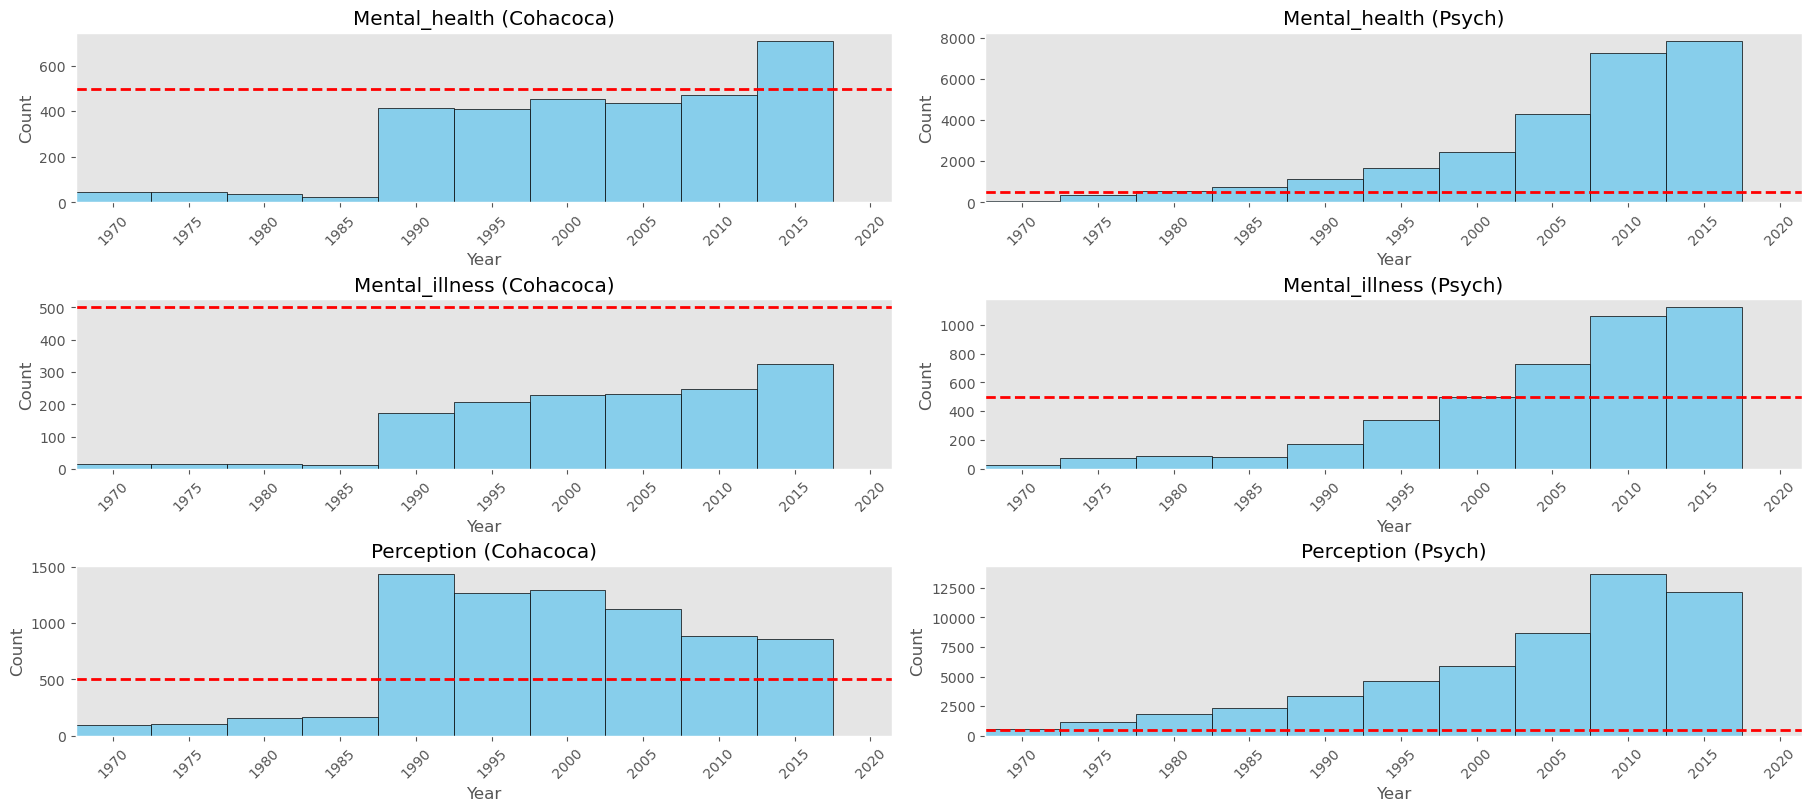

In [4]:
import numpy as np

# Define the year range and padding
start_year = 1970
end_year = 2019
padding = 0.05  # Adjust this value for the desired amount of padding

# Define the interval for binning (5-year intervals)
interval = 5

# Calculate the adjusted x-axis limits with padding
x_min = start_year - (end_year - start_year) * padding
x_max = end_year + (end_year - start_year) * padding

# Plotting bar plots of count distribution for each term and corpus
fig, axs = plt.subplots(len(targets), len(corpora), figsize=(18, 8), constrained_layout=True)

for i, target in enumerate(targets):
    for j, corpus in enumerate(corpora):
        ax = axs[i, j]
        filtered_df = df[(df['target'] == target) & (df['corpus'] == corpus)]
        
        if not filtered_df.empty:
            # Convert 'year' column to numeric
            filtered_df['year'] = pd.to_numeric(filtered_df['year'])
            
            # Group data into 5-year intervals
            filtered_df['year_interval'] = (filtered_df['year'] // interval) * interval
            
            # Aggregate counts within each 5-year interval
            grouped_df = filtered_df.groupby('year_interval')['count'].sum().reset_index()
            
            # Plot bar plot of count distribution
            ax.bar(grouped_df['year_interval'], grouped_df['count'], width=interval, color='skyblue', edgecolor='black')
            ax.set_title(f"{target.capitalize()} ({corpus.capitalize()})")
            ax.set_xlabel('Year')
            ax.set_ylabel('Count')
            ax.grid(False)
            
            # Set x-axis ticks and labels explicitly for better control
            years = np.arange(start_year, end_year + interval, interval)
            ax.set_xticks(years)
            ax.set_xticklabels(years, rotation=45)
            
            # Add horizontal line at count = 50 (adjust as needed)
            ax.axhline(y=500, color='red', linestyle='--', linewidth=2)
            
            # Set adjusted x-axis limits with padding
            ax.set_xlim(x_min, x_max)
            
        else:
            # If no data matches the filtering criteria, show a message
            ax.text(0.5, 0.5, "No Data", ha='center', va='center', transform=ax.transAxes)

plt.show()
